In [1]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imutils import build_montages
from imutils import paths
import random
import cv2

In [3]:
Data = pd.read_csv(r"G:\PYTHON\FinalYr_Phase-2\Meta_data.csv")

In [4]:
Data.head()

,Unnamed: 0,path,value
0,0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [5]:
Data.drop(Data.columns[0], axis=1, inplace=True)

In [6]:
Data.head()

,path,value
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0


In [7]:
Data['split'] = np.random.randn(Data.shape[0], 1)

msk = np.random.rand(len(Data)) <= 0.8

train = Data[msk]
test = Data[~msk]

In [8]:
print(train.value.value_counts())
print(test.value.value_counts())

0    2868
2    2834
1    1607
Name: value, dtype: int64
0    748
2    666
1    438
Name: value, dtype: int64


In [9]:
train.reset_index(inplace=True)

In [10]:
train.drop(train.columns[0], axis=1, inplace=True)
train.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1.png,0,-2.198784
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-10.png,0,-2.184412
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-100.png,0,-1.020500
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1000.png,0,0.087302
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1004.png,0,0.497335


In [11]:
data = []
image_size = 224
test_pixel_data = []
import matplotlib.pyplot as plt
from PIL import Image


for i in range(len(train)):
    img_array = Image.open(train['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    #print(i,np.array(new_img_array).shape,train['value'][i])
    data.append([new_img_array, train['value'][i]])


In [12]:
test.reset_index(inplace=True)

In [13]:
test.drop(test.columns[0], axis=1, inplace=True)
test.head()

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,path,value,split
0,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1001.png,0,0.245957
1,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1002.png,0,-0.757489
2,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1003.png,0,0.427668
3,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1012.png,0,0.013160
4,G:\PYTHON\FinalYr_Phase-2\COVID\COVID-1016.png,0,0.432304


In [14]:
for i in range(len(test)):
    img_array = Image.open(test['path'][i])
    new_img_array = np.array(img_array)
    if new_img_array.ndim == 2:
        new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
    new_img_array = cv2.resize(new_img_array,(224,224))
    test_pixel_data.append(new_img_array)

In [15]:
np.random.shuffle(data)
x = []
y = []

counter = 406
count = 0

for image in data:
    try:
        x.append(image[0])
        y.append(image[1])
    except:
        print(count)
    count += 1

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [16]:
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([2868, 1607, 2834], dtype=int64))

In [17]:
pd.Series(y).value_counts()

0    2868
2    2834
1    1607
dtype: int64

In [18]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42,stratify=y)

In [19]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [20]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(5847, 224, 224, 3) (1462, 224, 224, 3) (1852, 224, 224, 3)


In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=8)

val_generator = val_datagen.flow(X_val,y_val,batch_size=8)

In [22]:
print(X_train.shape,y_train.shape,X_val.shape)

(5847, 224, 224, 3) (5847, 3) (1462, 224, 224, 3)


In [27]:
from tensorflow.keras.applications import VGG16,InceptionV3,DenseNet201,ResNet50
from keras.layers import *
from keras.models import Sequential
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam

In [28]:
def build_model():
    model = Sequential()

    conv_base = ResNet50(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
    model.add(conv_base)
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
    model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax'))
    for layer in model.layers:
        layer.trainable = True
 
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',"Precision","Recall"])

    return model

In [29]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=3, min_lr=1e-5, verbose=0),
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=10, verbose=1, mode='auto')]

In [30]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 27,806,595
Trainable params: 27,745,283
Non-trainable params: 61,312
_________________________________________________________________


C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [31]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
Tensorboard = TensorBoard(log_dir="G:\PYTHON\FinalYr_Phase-2\logs\{}".format(time()))

In [32]:
%%timeit -n1 -r1 
with tf.device("GPU"):
    model.fit(train_generator,steps_per_epoch=87,epochs=100,validation_data=val_generator,validation_steps=22,callbacks=[cbs,Tensorboard])

C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
87/87 [==============================] - 46s 341ms/step - loss: 690.4626 - accuracy: 0.8204 - precision: 0.8358 - recall: 0.8118 - val_loss: 558.1111 - val_accuracy: 0.4773 - val_precision: 0.4773 - val_recall: 0.4773
Epoch 2/100
87/87 [==============================] - 27s 307ms/step - loss: 443.6354 - accuracy: 0.8994 - precision: 0.9054 - recall: 0.8937 - val_loss: 340.9143 - val_accuracy: 0.3750 - val_precision: 0.3750 - val_recall: 0.3750
Epoch 3/100
87/87 [==============================] - 26s 303ms/step - loss: 254.7031 - accuracy: 0.8980 - precision: 0.9017 - recall: 0.8966 - val_loss: 184.8854 - val_accuracy: 0.2045 - val_precision: 0.2045 - val_recall: 0.2045
Epoch 4/100
87/87 [==============================] - 27s 312ms/step - loss: 132.1738 - accuracy: 0.8922 - precision: 0.8935 - recall: 0.8922 - val_loss: 93.5917 - val_accuracy: 0.2500 - val_precision: 0.2500 - val_recall: 0.2500
Epoch 5/100
87/87 [==============================] - 27s 313ms/step - loss: 64.07

Epoch 20/100
87/87 [==============================] - 27s 313ms/step - loss: 3.5365 - accuracy: 0.9009 - precision: 0.9019 - recall: 0.8980 - val_loss: 3.5466 - val_accuracy: 0.4716 - val_precision: 0.4716 - val_recall: 0.4716
Epoch 21/100
87/87 [==============================] - 26s 304ms/step - loss: 3.3549 - accuracy: 0.9195 - precision: 0.9233 - recall: 0.9167 - val_loss: 2.7548 - val_accuracy: 0.5966 - val_precision: 0.6711 - val_recall: 0.5795
Epoch 22/100
87/87 [==============================] - 27s 312ms/step - loss: 2.1895 - accuracy: 0.9454 - precision: 0.9467 - recall: 0.9440 - val_loss: 3.9394 - val_accuracy: 0.5568 - val_precision: 0.5607 - val_recall: 0.5511
Epoch 23/100
87/87 [==============================] - 27s 312ms/step - loss: 2.6638 - accuracy: 0.9411 - precision: 0.9423 - recall: 0.9382 - val_loss: 13.3877 - val_accuracy: 0.4602 - val_precision: 0.4602 - val_recall: 0.4602
Epoch 24/100
87/87 [==============================] - 27s 312ms/step - loss: 1.8017 - accur

Epoch 00038: early stopping
17min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


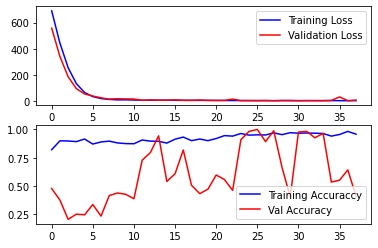

In [33]:
fig, ax  = plt.subplots(2,1)

#Loss
ax[0].plot(model.history.history['loss'], color = 'b', label='Training Loss')
ax[0].plot(model.history.history['val_loss'], color = 'r', label='Validation Loss')
ax[0].legend()
#Accuracy
ax[1].plot(model.history.history['accuracy'], color='b', label='Training Accuraccy')
ax[1].plot(model.history.history['val_accuracy'], color='r', label='Val Accuracy')
ax[1].legend()

In [34]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [35]:
pred = model.predict(X_val/255)
predictions = np.argmax(pred,axis=1)
test_evaluation = model.evaluate(val_generator)

183/183 [==============================] - 16s 89ms/step - loss: 5.5729 - accuracy: 0.4658 - precision: 0.4658 - recall: 0.4658


In [36]:
train_evaluation = model.evaluate(train_generator)

731/731 [==============================] - 62s 85ms/step - loss: 5.5118 - accuracy: 0.4577 - precision: 0.4577 - recall: 0.4577


In [37]:
model.save("G:\\PYTHON\\FinalYr_Phase-2\\weights\\ResNet50.h5")

In [38]:
Y_VAL = np.array(list(pd.DataFrame(y_val).idxmax(axis=1)))

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_VAL,predictions))
print(classification_report(Y_VAL,predictions,digits=3))

[[574   0   0]
 [214 107   0]
 [567   0   0]]
              precision    recall  f1-score   support

           0      0.424     1.000     0.595       574
           1      1.000     0.333     0.500       321
           2      0.000     0.000     0.000       567

    accuracy                          0.466      1462
   macro avg      0.475     0.444     0.365      1462
weighted avg      0.386     0.466     0.343      1462



C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhanu\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


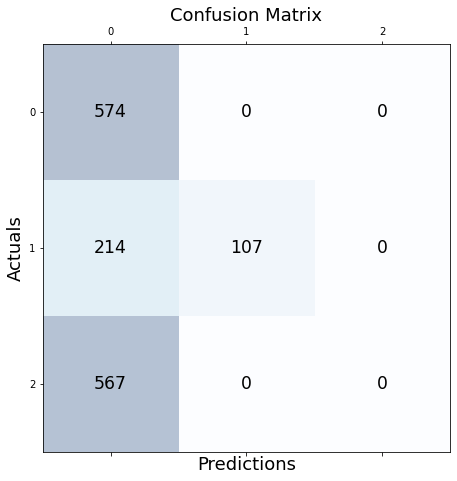

In [40]:
conf_matrix = confusion_matrix(Y_VAL,predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
from keras.models import load_model
model = load_model("G:\\PYTHON\\FinalYr_Phase-2\\weights\\Dense_net.h5")

In [38]:
%matplotlib inline
# get sample image to test.
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_covid = 'G:\\PYTHON\\Final_year_project\\Final\\covid_image_data\\covid_image_data\\Images\\COVID\\COVID-3.png'
img_normal = 'G:\\PYTHON\\FinalYr_Phase-2\\Normal\\Normal-99.png'
img_test = 'G:\\PYTHON\\FinalYr_Phase-2\\NON_COVID\\Non_COVID-15.png'

img_array = Image.open(img_test)
new_img_array = np.array(img_array)
if new_img_array.ndim == 2:
    new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2BGR)
new_img_array = cv2.resize(new_img_array,(224,224))




dt = []
dt.append(new_img_array)
X = np.array(dt)
X = X/255
val = model.predict(X)
print("Prediction :",np.argmax(val,axis=1))

Prediction : [1]
